<a href="https://colab.research.google.com/github/FreeRikato/Deep-learning-lab/blob/main/CNN/Dog_Bird_Fish_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Path to the dataset folder in your Google Drive
dataset_path = '/content/drive/MyDrive/bird_dog_fish'

# Define paths to train, test, and validation folders
train_dir = os.path.join(dataset_path, 'train_bird_dog_fish')
test_dir = os.path.join(dataset_path, 'test_bird_dog_fish')
val_dir = os.path.join(dataset_path, 'test_bird_dog_fish')

# Define image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and image size
batch_size = 32
img_size = (224, 224)

# Load and preprocess training set
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess validation set
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load and preprocess testing set
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2401 images belonging to 3 classes.
Found 698 images belonging to 3 classes.
Found 698 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
# Define the number of training and validation steps
train_steps = len(train_generator)
val_steps = len(val_generator)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_steps
)
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Epoch 1/30
76/76 [==============================] - 1155s 15s/step - loss: 1.0195 - accuracy: 0.4973 - val_loss: 0.9749 - val_accuracy: 0.5301
Epoch 2/30
76/76 [==============================] - 16s 212ms/step - loss: 0.8241 - accuracy: 0.6327 - val_loss: 0.8265 - val_accuracy: 0.6261
Epoch 3/30
76/76 [==============================] - 16s 209ms/step - loss: 0.7581 - accuracy: 0.7143 - val_loss: 0.7949 - val_accuracy: 0.6476
Epoch 4/30
76/76 [==============================] - 16s 205ms/step - loss: 0.6291 - accuracy: 0.7355 - val_loss: 0.8203 - val_accuracy: 0.6705
Epoch 5/30
76/76 [==============================] - 18s 234ms/step - loss: 0.5581 - accuracy: 0.7901 - val_loss: 0.6236 - val_accuracy: 0.7307
Epoch 6/30
76/76 [==============================] - 17s 226ms/step - loss: 0.5067 - accuracy: 0.8122 - val_loss: 0.6590 - val_accuracy: 0.7521
Epoch 7/30
76/76 [==============================] - 16s 205ms/step - loss: 0.4411 - accuracy: 0.8401 - val_loss: 0.6173 - val_accuracy: 0.7679

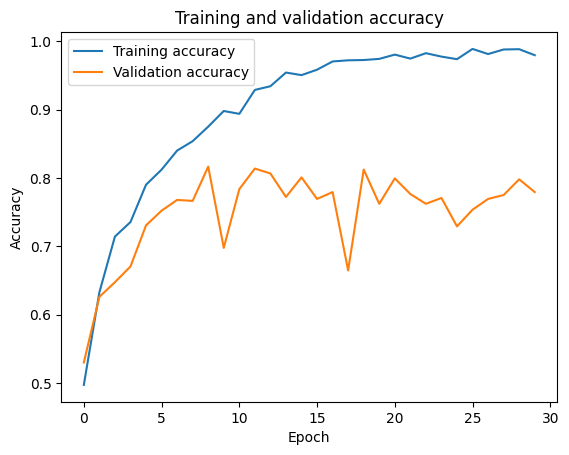

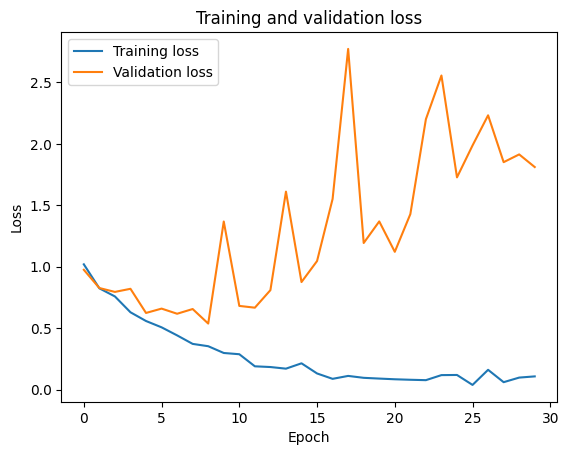

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()